In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

# Other Sampling Methods
## Inverse Transform Sampling

Inverse Transform Sampling is based on the [probability integral transform](https://en.wikipedia.org/wiki/Probability_integral_transform) which states that a random variable defined as $Y = F_X(X)$, where $F_X$ is the cumulative distribution function (CDF) of $X$, has the distribution $\mathcal{U}[0,1]$. The inverse probability integral transform then states than a random variable $\hat{X} = F_X^{-1}(Y)$ where $Y \sim \mathcal{U}[0,1]$ has the same probability distribution as $X$. This allows us to easily sample from probability distributions whose inverse of CDFs can be computed easily. 

### Cauchy Distribution
The PDF is given by
$$Cauchy(x_o,\gamma) = \frac{1}{\pi\gamma\Bigg[1+\Big(\frac{x-x_0}{\gamma}\Big)^2\Bigg]}$$   
and the CDF by
$$P(X \leq x) = \frac{1}{2} + \frac{1}{\pi}\tan^{-1}{\Big(\frac{x-x_0}{\gamma}\Big)}$$  
For $Cauchy(0,1)$,
$$F_X^{-1}(y) = \tan{\Bigg[\pi\Big(y-\frac{1}{2}\Big)\Bigg]}$$

In [2]:
cauchy = lambda x: 1./np.pi/(1+x**2)

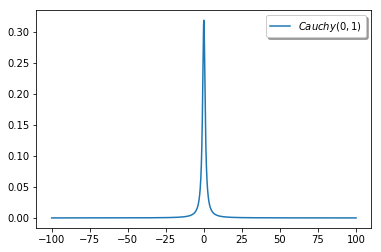

In [3]:
xvals = np.linspace(-100, 100, 10000)
plt.plot(xvals, cauchy(xvals), label='$Cauchy(0,1)$')
plt.legend(loc='upper right', shadow=True)
plt.show()

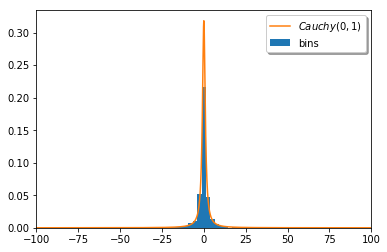

In [5]:
y = np.random.uniform(0, 1, 1000)
x = np.tan(np.pi * (y - 0.5))
plt.hist(x, normed=1, bins=1000, label='bins')
plt.plot(xvals, cauchy(xvals), label='$Cauchy(0,1)$')
plt.xlim(-100, 100)
plt.legend(loc='upper right', shadow=True)
plt.show()

### Exponential Distribution
The PDF is given by
$$Exp(\lambda) = \lambda e^{-\lambda x}\,\,\,\forall\,\,x \in [0,\infty)$$   
and the CDF by
$$P(X \leq x) = 1-e^{-\lambda x}$$  
For $Exp(1)$,
$$F_X^{-1}(y) = -\log_e{(1-y)}$$

In [6]:
exponential = lambda x: np.exp(-x)

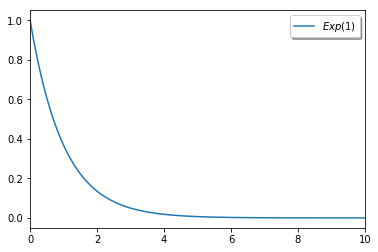

In [7]:
xvals = np.linspace(0, 10, 100)
plt.plot(xvals, exponential(xvals), label='$Exp(1)$')
plt.legend(loc='upper right', shadow=True)
plt.xlim(0, 10)
plt.show()

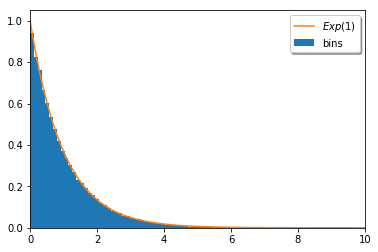

In [8]:
y = np.random.uniform(0, 1, 100000)
x = -np.log((1 - y))
plt.hist(x, normed=1, bins=100, label='bins')
plt.plot(xvals, exponential(xvals), label='$Exp(1)$')
plt.xlim(0, 10)
plt.legend(loc='upper right', shadow=True)
plt.show()

### Gumbel Distribution
The PDF is given by
$$Gumbel(\mu,\beta) = \frac{e^{-(z+e^{-z})}}{\beta}$$   
where $z = \frac{x-\mu}{\beta}$   

The CDF is given by
$$P(X \leq x) = e^{-e^{-(x-\mu)/\beta}}$$  
For $Gumbel(0,1)$,
$$F_X^{-1}(y) = -\log_e(-\log_e(y))$$

In [9]:
gumbel = lambda x: np.exp(-(x + np.exp(-x)))

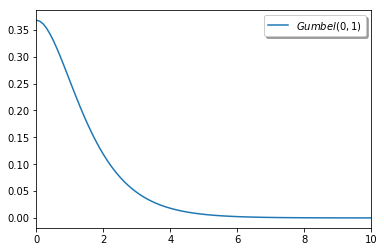

In [10]:
xvals = np.linspace(0, 10, 100)
plt.plot(xvals, gumbel(xvals), label='$Gumbel(0,1)$')
plt.legend(loc='upper right', shadow=True)
plt.xlim(0, 10)
plt.show()

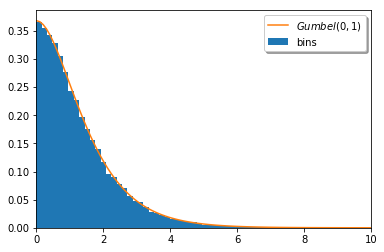

In [11]:
y = np.random.uniform(0, 1, 100000)
x = -np.log(-np.log(y))
plt.hist(x, normed=1, bins=100, label='bins')
plt.plot(xvals, gumbel(xvals), label='$Gumbel(0,1)$')
plt.xlim(0, 10)
plt.legend(loc='upper right', shadow=True)
plt.show()